Dataset : Customer Personality Analysis (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

**Context**

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**
**Attributes**

**People**

**ID:** Customer's unique identifier

**Year_Birth:** Customer's birth year

**Education:** Customer's education level

**Marital_Status:** Customer's marital status

**Income**: Customer's yearly household income

**Kidhome:** Number of children in customer's household

**Teenhome:** Number of teenagers in customer's household

**Dt_Customer:** Date of customer's enrollment with the company

**Recency:** Number of days since customer's last purchase

**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

**NumDealsPurchases: Number of purchases made with a discount**

**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2:**1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

**NumWebPurchases:** Number of purchases made through the company’s website

**NumCatalogPurchases:** Number of purchases made using a catalogue

**NumStorePurchases:** Number of purchases made directly in stores

**NumWebVisitsMonth:** Number of visits to company’s website in the last month

**Load Libraries**

In [ ]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

**Load Datasets**

In [ ]:
df=pd.read_csv("/content/marketing_campaign.csv",sep='\t')

In [ ]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


**Data cleaning**

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2216, 29)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Data Preprocesing**

In [ ]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
def status(x):
  if x=='Married':
    x='M'
  elif x=='Together':
    x='M'
  elif x=='Single':
    x='S'
  elif x== 'Divorced':
    x='M'
  elif x=='Widow':
    x='M'
  elif x=='Alone':
    x='S'
  elif x=='Absurd':
     x='S'
  elif x== 'YOLO':
    x='S'
  return x

In [ ]:
df['Marital_Status']=df['Marital_Status'].apply(lambda x:status(x))

In [ ]:
df.Marital_Status.value_counts()

M    1738
S     478
Name: Marital_Status, dtype: int64

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [ ]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,S,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,S,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
def Education(x):
  if x=='PhD':
    x='PhD'
  elif x=='Master':
    x='Master'
  elif x=='2n Cycle':
    x='Basic'
  elif x=='Basic':
     x='Basic'
  return x  

In [ ]:
df['Education']=df['Education'].apply(lambda x : Education(x))

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
Basic          254
Name: Education, dtype: int64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,S,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,S,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,M,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,M,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,M,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


**Making copy of data**

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df1['Age']=2022-df1['Year_Birth']
df1["Total_kids"] = df1["Kidhome"] + df1["Teenhome"]
df1.drop(["Z_CostContact","Z_Revenue","ID","Year_Birth"],axis=1,inplace=True) # droping columns which are not required

In [ ]:
df1.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids
0,Graduation,S,58138.0,0,0,2012-04-09,58,635,88,546,...,7,0,0,0,0,0,0,1,65,0
1,Graduation,S,46344.0,1,1,2014-08-03,38,11,1,6,...,5,0,0,0,0,0,0,0,68,2


In [ ]:
#df1["Total_Mnt_Non_Veg"] = df1["MntMeatProducts"] + df1["MntFishProducts"]
#df1["Total_Purchases"] = df1["NumWebPurchases"] + df1["NumCatalogPurchases"] + df1["NumStorePurchases"]+df1['NumWebVisitsMonth']

In [ ]:
df2=df1.copy()

In [ ]:
df2.drop(["Kidhome","Teenhome","Dt_Customer"],axis=1,inplace=True)

In [ ]:
df2.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids
0,Graduation,S,58138.0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,1,65,0
1,Graduation,S,46344.0,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,0,68,2


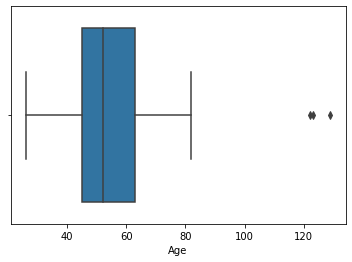

In [ ]:
sns.boxplot(x = df2['Age'])
plt.show()

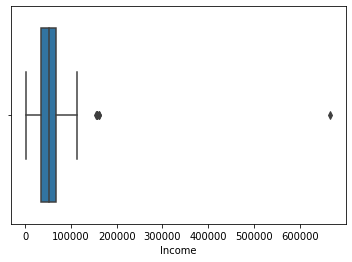

In [ ]:
sns.boxplot(x = df2['Income'])
plt.show()

Removing Outlers

In [ ]:
df3 = df2[(df2["Age"]<90)]
df3 = df2[(df2["Income"]<120000)]

In [ ]:
df3.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids
0,Graduation,S,58138.0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,1,65,0
1,Graduation,S,46344.0,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,0,68,2


In [ ]:
df3.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_kids'],
      dtype='object')

In [ ]:
df3.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2',],axis=1,inplace=True) # droping columns which not required

In [ ]:
df3.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_kids
0,Graduation,S,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,0
1,Graduation,S,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,2


**Now Applying K-means Clustering**

Target
Need to perform clustering to summarize customer segments.

Here we need domain expert for deciding number of cluster.

In [ ]:
df3.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Total_kids'],
      dtype='object')

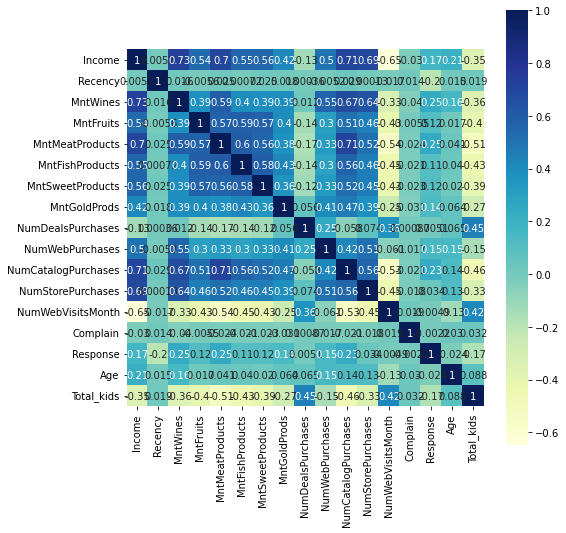

In [ ]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df4 = df3[['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Total_kids']] #Subsetting the data
cor = df4.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

In [ ]:
df4.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_kids
0,Graduation,S,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,0
1,Graduation,S,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,2
2,Graduation,M,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,0
3,Graduation,M,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,1
4,PhD,M,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,1


**Proceding for chaning categorial columns  for preprocessing , with Label Encoded.**

In [ ]:
Catergorical_Col=['Marital_Status','Education']

In [ ]:
# Encoding of categorical class variable to integers which will be used for feeding the model
def labelencode(x):
    le = LabelEncoder()
    le_encoded = le.fit_transform(x)
    #le_encoded = le.transform(le)
    print((le.classes_))
    print(le_encoded)
    return le_encoded

In [ ]:
Catergorical_Col=['Marital_Status','Education']
for x in Catergorical_Col:
    
    df4[x] = labelencode(df4[x])
                     

['M' 'S']
[1 1 0 ... 0 0 0]
['Basic' 'Graduation' 'Master' 'PhD']
[1 1 1 ... 1 2 3]


In [ ]:
df4.loc[0:]

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_kids
0,1,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,0
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,2
2,1,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,0
3,1,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,1
4,3,0,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,55,1
2236,3,0,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,76,3
2237,1,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,41,0
2238,2,0,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,66,1


In [ ]:
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [ ]:
clust_labels, cent = doKmeans(df4, 2)
kmeans = pd.DataFrame(clust_labels)
df4.insert((df4.shape[1]),'kmeans',kmeans)

In [ ]:
df4.head(2)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_kids,kmeans
0,1,1,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,0,0
1,1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,2,1


In [ ]:
# Convert Cluster to

def condition(x):
    if x == 0:
        x = "cluster0"
    elif x == 1:
        x = "cluster1"
    else:
        x = "cluster2"
    
    return x

# df["cluster_name"] = df["kmeans"].apply(lambda x: "cluster0" if x == 0 else "cluster1")
df4["cluster_name"] = df4["kmeans"].apply(lambda x: condition(x))

In [ ]:
df4.head(10)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_kids,kmeans,cluster_name
0,1,1,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,1,65,0,0,cluster0
1,1,1,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,0,0,68,2,1,cluster1
2,1,0,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,0,57,0,0,cluster0
3,1,0,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,0,0,38,1,1,cluster1
4,3,0,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,0,0,41,1,0,cluster0
5,2,0,62513.0,16,520,42,98,0,42,14,...,6,4,10,6,0,0,55,1,0,cluster0
6,1,0,55635.0,34,235,65,164,50,49,27,...,7,3,7,6,0,0,51,1,0,cluster0
7,3,0,33454.0,32,76,10,56,3,1,23,...,4,0,4,8,0,0,37,1,1,cluster1
8,3,0,30351.0,19,14,0,24,3,3,2,...,3,0,2,9,0,1,48,1,1,cluster1
9,3,0,5648.0,68,28,0,6,1,1,13,...,1,0,0,20,0,0,72,2,1,cluster1


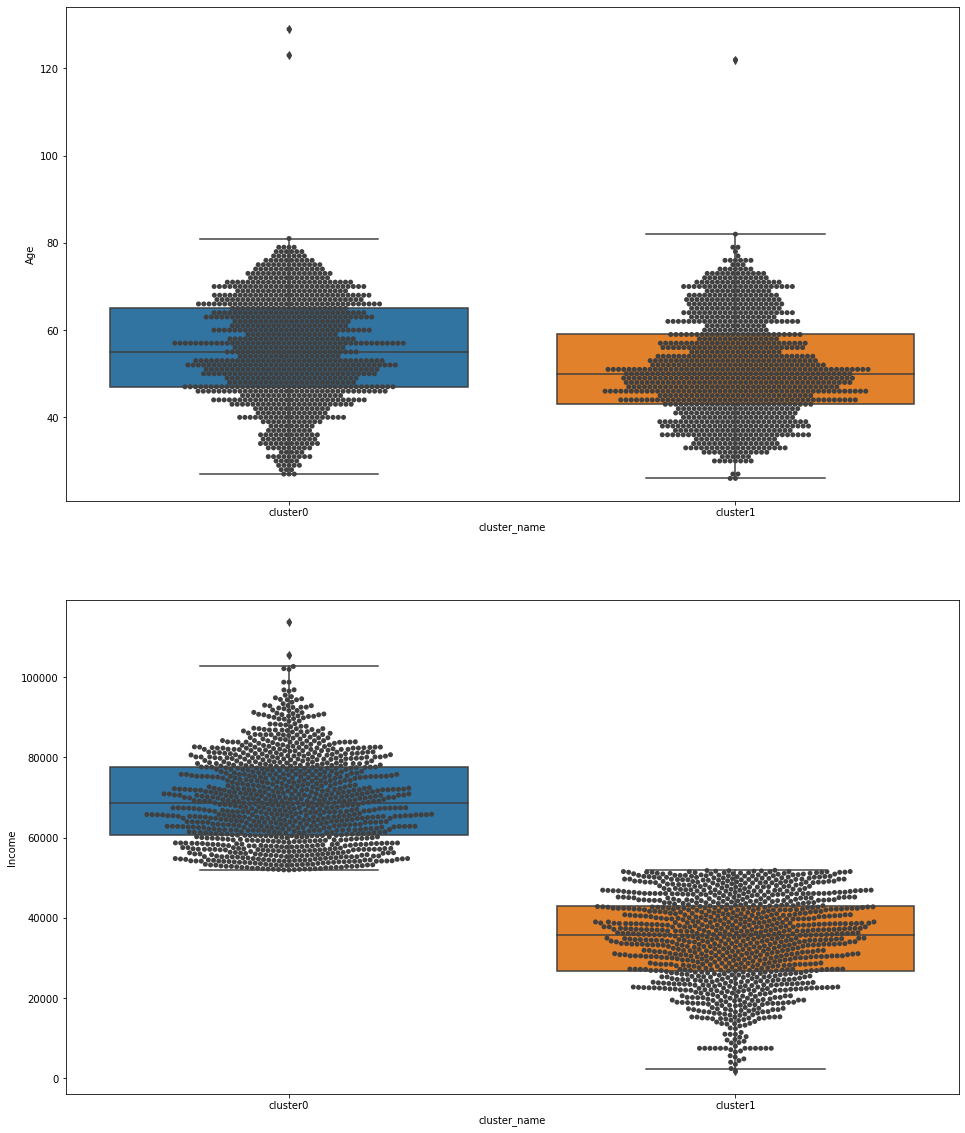

In [ ]:
fig,(ax2,ax3) = plt.subplots(nrows = 2)
fig.set_figwidth(16)
fig.set_figheight(20)
x = sns.boxplot(x="cluster_name", y='Age', data=df4, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Age', data=df4,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Income', data=df4, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Income', data=df4,color=".25",ax= ax3)

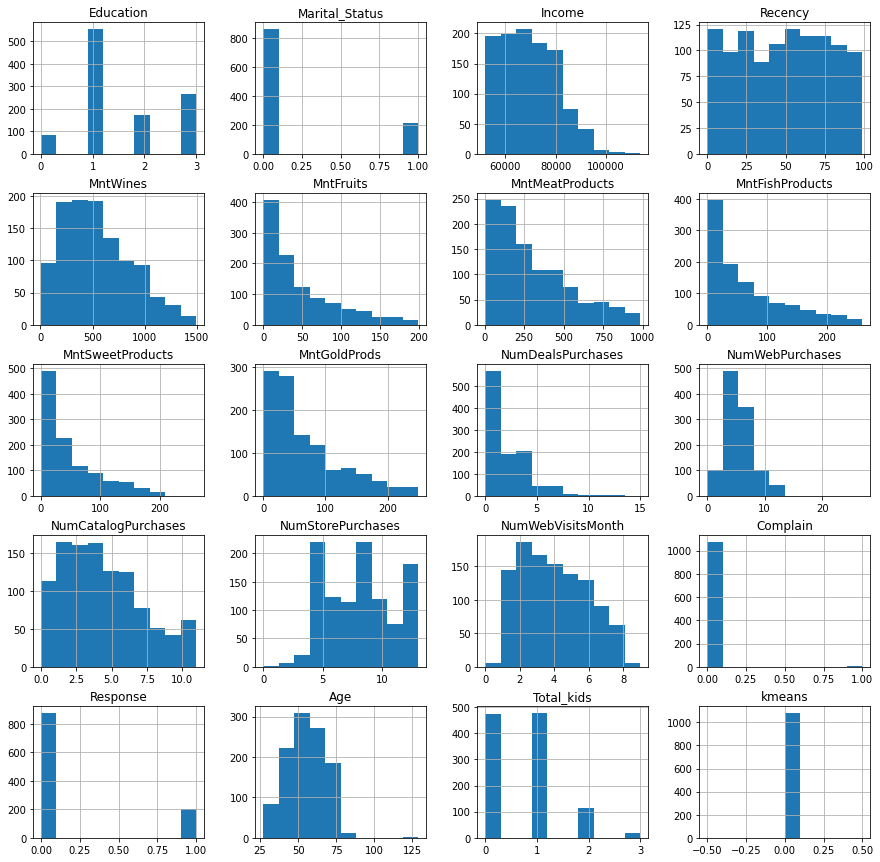

In [ ]:
df4[df4['cluster_name'] == 'cluster0'].hist(figsize = (15,15))
plt.show()

 Cluster 0:
 1. Married are more 
 2. Mostly are Graduate
 3. Most of them are Non-veg
 4. Income range between 60000 to 90000
 5. Age group 40-75
 6. Family having 1 kids
 7. Customer sent in MntMeatProducts,MntWines,MntFruits more as compaire to others in last 2 years

 8. NumWebPurchases: Number of purchases made through the company’s website is too low
 
9. NumCatalogPurchases: Number of purchases made using a catalogue range 1.5 to  10.5
10. NumStorePurchases: Number of purchases made directly in stores rang 5 to 14
11. NumWebVisitsMonth: Number of visits to company’s website in the last month is good




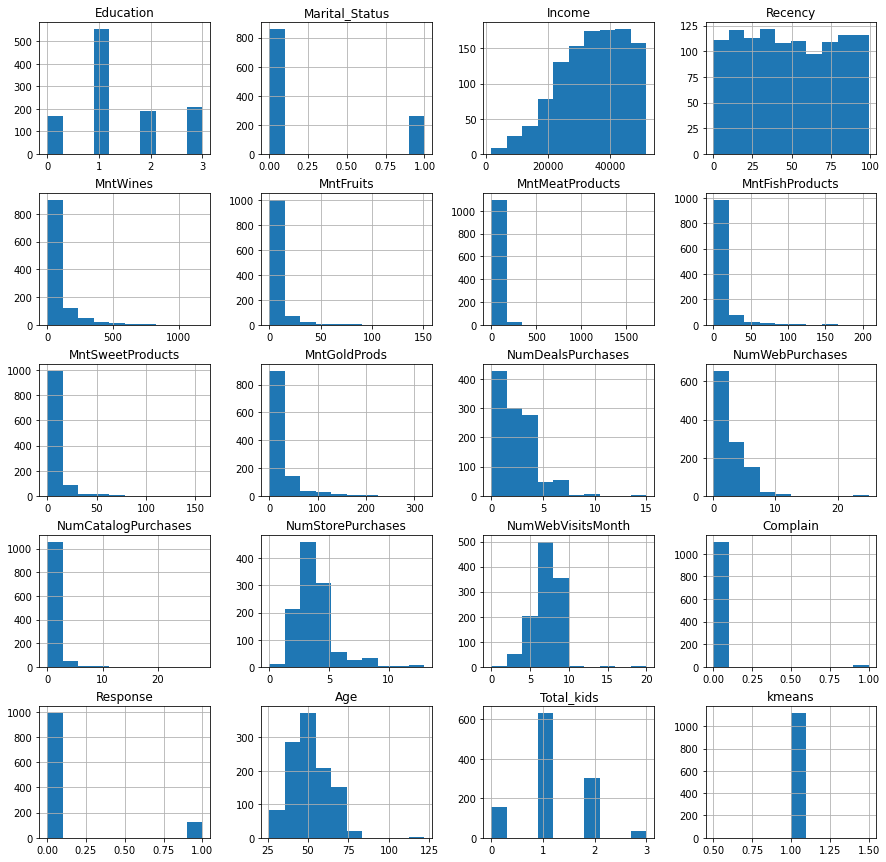

In [ ]:
df4[df4['cluster_name'] == 'cluster1'].hist(figsize = (15,15))
plt.show()

Cluster 0:

Married are more

Mostly are Graduate

less of them are Non-veg

Income range between 20000 to 60000

Age group 30-75

Family having 1 kids

Total purchase seems good

**Conclusion for both Cluster's.**

 Customers falls under Cluster-0 are more likely to buy products as comapire to Cluster-1.

Althought in both cluster mostly customer are married and age between  40 -75 .

Cluster-0 income  is more than Cluster-1.

Cluster-0 customer prefer wine, non-veg  and gold product.

Cluster-o customer visit from store  and cluster-1 visit website.

Response of customer falls under 'cluster-O' is good as comapire to 'cluster -1'
 



**Bye for Now !!!**